In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.layers import LSTM
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import Sequential, layers, optimizers
import datetime as datetime

In [2]:
np.random.seed(7)
df_train_infected = pd.read_csv('CONVENIENT_global_confirmed_cases.csv')
df_train_dead = pd.read_csv('CONVENIENT_global_deaths.csv')

In [3]:
df_train_infected.info()
df_train_dead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Columns: 282 entries, Country/Region to Zimbabwe
dtypes: float64(194), object(88)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Columns: 282 entries, Country/Region to Zimbabwe
dtypes: float64(194), object(88)
memory usage: 1.6+ MB


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
df_train_infected.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia.1,Australia.2,Australia.3,Australia.4,Australia.5,Australia.6,Australia.7,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Canada.1,Canada.2,Canada.3,Canada.4,Canada.5,Canada.6,Canada.7,Canada.8,Canada.9,Canada.10,Canada.11,Canada.12,Canada.13,Canada.14,Canada.15,Central African Republic,Chad,Chile,China,China.1,China.2,China.3,China.4,China.5,China.6,China.7,China.8,China.9,China.10,China.11,China.12,China.13,China.14,China.15,China.16,China.17,China.18,China.19,China.20,China.21,China.22,China.23,China.24,China.25,China.26,China.27,China.28,China.29,China.30,China.31,China.32,China.33,Colombia,Comoros,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Denmark.1,Denmark.2,Diamond Princess,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,France.1,France.2,France.3,France.4,France.5,France.6,France.7,France.8,France.9,France.10,France.11,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,MS Zaandam,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,Netherlands.1,Netherlands.2,Netherlands.3,Netherlands.4,New Zealand,New Zealand.1,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom.1,United Kingdom.2,United Kingdom.3,United Kingdom.4,United Kingdom.5,United Kingdom.6,United Kingdom.7,United Kingdom.8,United Kingdom.9,United Kingdom.10,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alberta,British Columbia,Diamond Princess,Grand Princess,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Repatriated Travellers,Saskatchewan,Yukon,NaN,NaN,NaN,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,Heilongjiang,Henan,Hong Kong,Hubei,Hunan,Inner Mongolia,Jiangsu,Jiangxi,Jilin,Liaoning,Macau,Ningxia,Qinghai,Shaanxi,Shandong,Shanghai,Shanxi,Sichuan,Tianjin,Tibet,Unknown,Xinjiang,Yunnan,Zhejiang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faroe Islands,Greenland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French Guiana,French Polynesia,Guadeloupe,Martinique,Mayotte,New Caledonia,Reunion,Saint Barthelemy,Saint Pierre and Miquelon,St Martin,Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df_train_infected.insert(0, "Day", [x for x in range (0,748)])
df_train_dead.insert(0, "Day", [x for x in range (0,748)])

<AxesSubplot:xlabel='United Kingdom.11'>

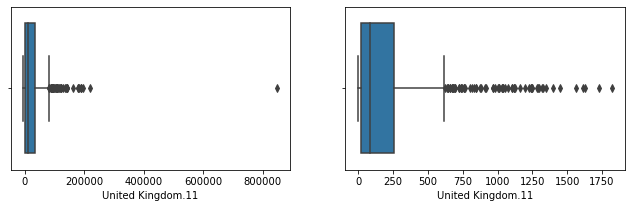

In [6]:
fig, ax =plt.subplots(1,2,figsize=(11,3))
sns.boxplot(x=df_train_infected["United Kingdom.11"], ax=ax[0])
sns.boxplot(x=df_train_dead["United Kingdom.11"], ax=ax[1])

<AxesSubplot:xlabel='United Kingdom.11'>

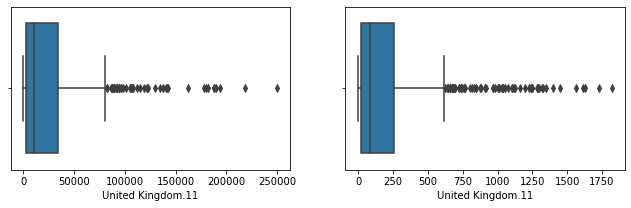

In [7]:
df_train_infected["United Kingdom.11"].clip(lower=0, upper=250000, inplace=True)
fig, ax =plt.subplots(1,2,figsize=(11,3))
sns.boxplot(x=df_train_infected["United Kingdom.11"], ax=ax[0])
sns.boxplot(x=df_train_dead["United Kingdom.11"], ax=ax[1])

Text(0, 0.5, 'Day since epidemy start')

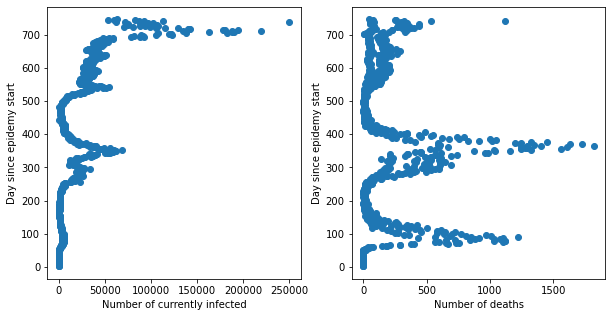

In [8]:
fig, ax =plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(x = df_train_infected["United Kingdom.11"] , y = df_train_infected["Day"])
ax[0].set_xlabel("Number of currently infected")
ax[0].set_ylabel("Day since epidemy start")

ax[1].scatter(x = df_train_dead["United Kingdom.11"] , y = df_train_dead["Day"])
ax[1].set_xlabel("Number of deaths")
ax[1].set_ylabel("Day since epidemy start")

(array([507.,  98.,  53.,  37.,  13.,  14.,  12.,   8.,   3.,   2.]),
 array([   0.,  182.,  364.,  546.,  728.,  910., 1092., 1274., 1456.,
        1638., 1820.]),
 <BarContainer object of 10 artists>)

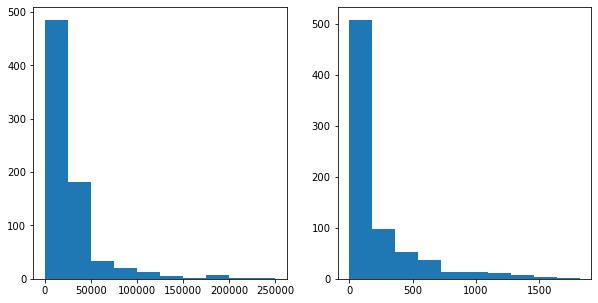

In [9]:
fig, axs = plt.subplots(1, 2,figsize=(10,5))
axs[0].hist(df_train_infected["United Kingdom.11"] )
axs[1].hist(df_train_dead["United Kingdom.11"] )

In [10]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
def preprocess(df, country, time_step, scaler):
    df_country_cases = df[["Country/Region", country]].copy()
    df_country_cases = df_country_cases.drop(labels=0, axis=0)
    df_country_cases.columns=["Day", "Confirmed Cases"]
    df_country_cases["Day"] = pd.to_datetime(df_country_cases["Day"], format="%m/%d/%y")
    df1 = df_country_cases["Confirmed Cases"].to_numpy()
    
    if scaler == "StandardScaler":
        scaler_ = StandardScaler()
        df1 = scaler_.fit_transform((df1).reshape(-1,1)) 
    elif scaler =="MinMaxScaler":
        scaler_ = MinMaxScaler()
        df1 = scaler_.fit_transform((df1).reshape(-1,1))
    else: pass

    training_size = int(len(df1)*0.7) 
    #test_size = len(df1)-training_size
    train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1), :1]

    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    return X_train, y_train, X_test, y_test

In [12]:
def model(optimizer_, learning_rate, X_train, y_train, time_step):
    model = Sequential()
    model.add(layers.LSTM(50, input_shape=(time_step, 1)))
    model.add(layers.Dense(1))

    if optimizer_ == "Adam":
        opt = optimizers.Adam(learning_rate)
    elif optimizer_ =="SGD":
        opt = optimizers.SGD(learning_rate)
    model.compile(loss="mean_squared_error", optimizer=opt)
    return model.fit(X_train, y_train, epochs=50, batch_size=512)

In [13]:
def plots(Dataset):
    plt.figure(figsize=(10,10))
    Dataset.columns=["Day", "Confirmed Cases"]
    plt.plot(Dataset["Day"], Dataset["Confirmed Cases"])

In [14]:
X_train, y_train, X_test, y_test = preprocess(df_train_infected, "United Kingdom.11", 3, "MinMaxScaler")
history = model("Adam", 0.001, X_train, y_train, 3)

Epoch 1/50
2/2 [==============================] - 4s 8ms/step - loss: 0.0047
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 11/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 13/50
2/2 [==============================] - 0s 4ms/step - loss: 0.

In [16]:
X_train, y_train, X_test, y_test = preprocess(df_train_dead, "United Kingdom.11", 3, "MinMaxScaler")
history = model("Adam", 0.001, X_train, y_train, 3)

Epoch 1/50
2/2 [==============================] - 3s 4ms/step - loss: 0.0498
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0451
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0408
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0370
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0335
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0305
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0279
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0258
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0243
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0232
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0224
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 13/50
2/2 [==============================] - 0s 8ms/step - loss: 0.